<a href="https://colab.research.google.com/github/rbauza7/Dataset-Iris/blob/main/Copia_de_Proyecto_Mineria_de_datos_Bauza_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Proyecto final del módulo MINERIA DE DATOS**

**Clasificación de Especies de Flores mediante Técnicas de Agrupamiento No Supervisado: Aplicación del Modelo de Mezcla Gaussiana**

**Roberto Bauza Fermín CC 0962108650**

**Introducción** El presente proyecto tiene como objetivo explorar el uso de técnicas de minería de datos no supervisadas para identificar patrones en datos multidimensionales. Se aplicará el Modelo de Mezcla Gaussiana (GMM) al conocido conjunto de datos Iris, con el fin de clasificar especies de flores basándose en medidas biométricas como la longitud y el ancho de sépalos y pétalos. Este análisis busca demostrar la efectividad de los métodos probabilísticos para descubrir agrupaciones naturales sin necesidad de etiquetas previas.

**Instalar R**

In [ ]:
# Instalar R en Google Colab
!apt-get install -y r-base

# Instalar el kernel de R
!R -e "install.packages('IRkernel', repos='http://cran.us.r-project.org'); IRkernel::installspec(user = FALSE)"


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.4.2-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.

R version 4.4.2 (2024-10-31) -- "Pile of Leaves"
Copyright (C) 2024 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> install.packages('IRkernel', repos='http://cran.us.r-project.org'); IRkernel::installspec(user = FALS

**Instalar las Librerías Necesarias**

In [ ]:
# Instalar librerías necesarias en R
install.packages("ggplot2")       # Visualización de datos
install.packages("dplyr")         # Manipulación de datos
install.packages("factoextra")    # Visualización de clusters
install.packages("cluster")       # Algoritmos de clustering
install.packages("mclust")        # Gaussian Mixture Models


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Deriv’, ‘microbenchmark’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘carData’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘crosstalk’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Verificar la instalación de R**

In [ ]:
# Probar si R está funcionando correctamente
print("¡R está funcionando en Google Colab!")


[1] "¡R está funcionando en Google Colab!"


**Instalar Librerías en R**

In [ ]:
# Instalar librerías necesarias
install.packages("ggplot2")       # Visualización de datos
install.packages("dplyr")         # Manipulación de datos
install.packages("factoextra")    # Visualización de clusters
install.packages("cluster")       # Algoritmos de clustering
install.packages("mclust")        # Gaussian Mixture Models


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Cargar el Dataset Iris (Desde Git HUb)**

**Guardar el dataset Iris como un archivo CSV**

In [ ]:
# Guardar el dataset Iris como un archivo CSV
write.csv(iris, file = "iris.csv", row.names = FALSE)


**Cargar el Dataset Iris desde GitHub en R**

In [ ]:
# URL del archivo en GitHub (en formato raw)
url <- "https://raw.githubusercontent.com/rbauza7/Dataset-Iris/refs/heads/main/iris.csv"
# Leer el archivo CSV desde la URL
iris_data <- read.csv(url)

# Verificar las primeras filas del dataset cargado
head(iris_data)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


**Explorar los datos:**

In [ ]:
summary(iris_data)


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
   Species         
 Length:150        
 Class :character  
 Mode  :character  
                   
                   
                   

**Verificar las dimensiones:**


In [ ]:
dim(iris_data)


[1] 150   5

**Exploración visual del dataset:**

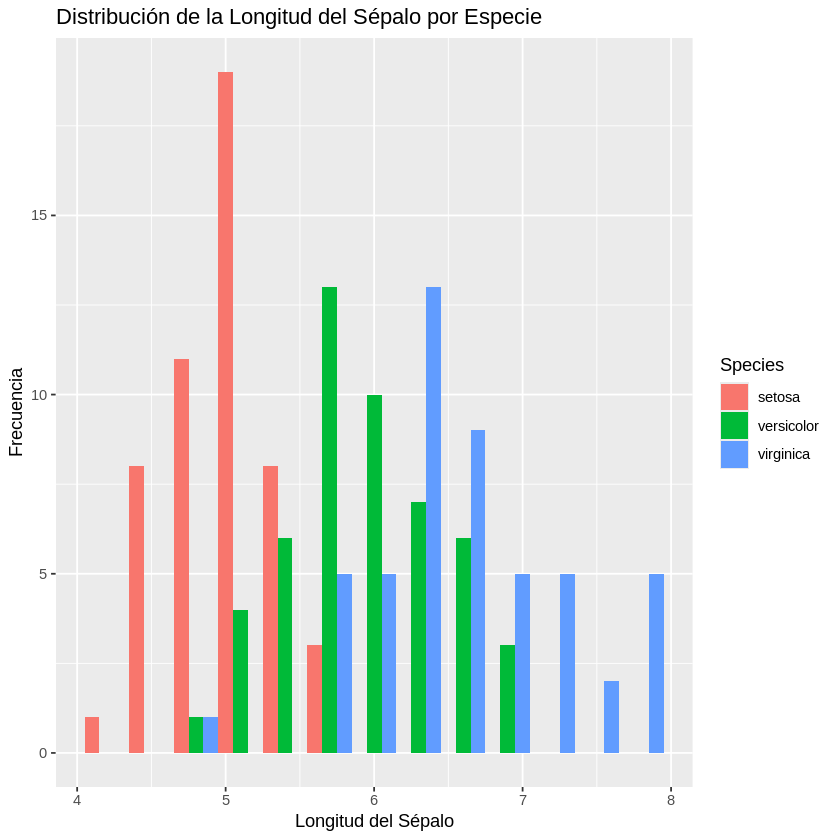

In [ ]:
ggplot(iris, aes(x = Sepal.Length, fill = Species)) +
    geom_histogram(binwidth = 0.3, position = "dodge") +
    labs(title = "Distribución de la Longitud del Sépalo por Especie",
         x = "Longitud del Sépalo",
         y = "Frecuencia")

**Observaciones:** El histograma revela diferencias en la distribución de la longitud del sépalo entre las tres especies de flores. Setosa tiene una distribución compacta, concentrándose en valores entre 4.5 y 5.5 cm, mientras que Versicolor muestra mayor dispersión, con su longitud del sépalo oscilando principalmente entre 5.5 y 6.5 cm. Por otro lado, Virginica domina en longitudes mayores a 6 cm, alcanzando hasta casi 8 cm. Estas diferencias revelan que la longitud del sépalo podría ser un factor discriminante para clasificar las especies, aunque existe cierto solapamiento entre Versicolor y Virginica en los valores intermedios.

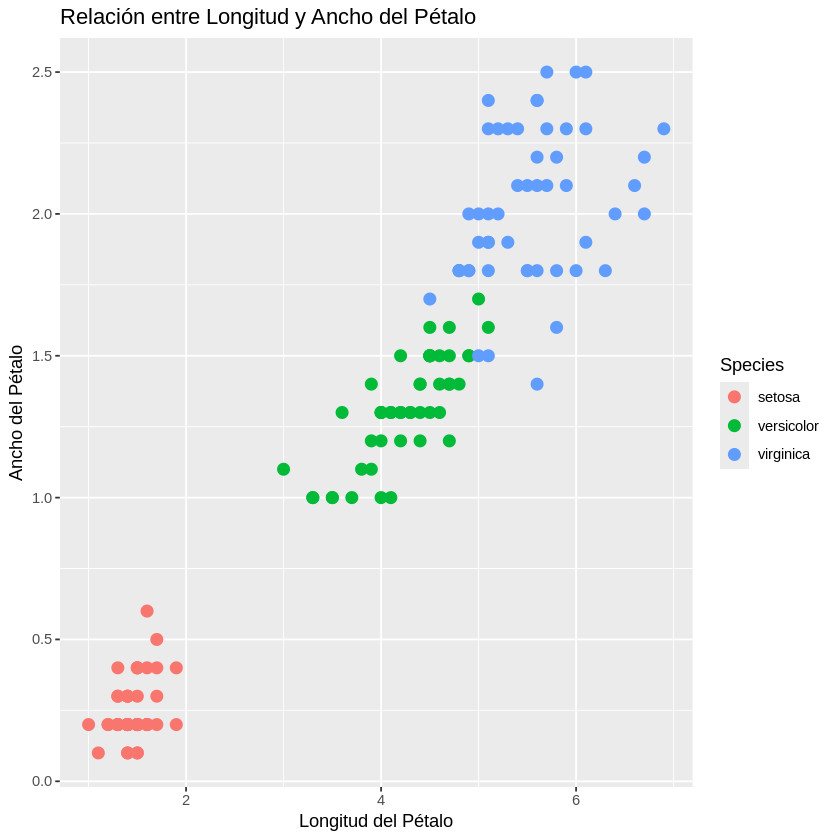

In [ ]:
# Gráfico de dispersión: Relación entre Longitud y Ancho del Pétalo
ggplot(iris, aes(x = Petal.Length, y = Petal.Width, color = Species)) +
    geom_point(size = 3) +
    labs(title = "Relación entre Longitud y Ancho del Pétalo",
         x = "Longitud del Pétalo",
         y = "Ancho del Pétalo")


**Observaciones:** Se observa una separación muy bien definida entre las tres especies de flores en función de la longitud y el ancho del pétalo. Setosa se agrupa distintivamente en la esquina inferior izquierda, con valores bajos tanto en longitud como en ancho. Por otro lado, Versicolor y Virginica forman dos grupos lineales más extendidos, pero diferenciables. Versicolor ocupa una región intermedia, mientras que Virginica domina los valores más altos de ambas variables. Este patrón muestra que estas dos variables son excelentes indicadores para clasificar las especies, especialmente porque los grupos están bien definidos con un mínimo solapamiento.

**Exploración de los datos**

In [ ]:
# Calcular estadísticas descriptivas
summary(iris[, -5])  # Resumen de las variables numéricas

# Calcular la matriz de correlación entre variables numéricas
cor(iris[, -5])

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.0000000,-0.1175698,0.8717538,0.8179411
Sepal.Width,-0.1175698,1.0000000,-0.4284401,-0.3661259
Petal.Length,0.8717538,-0.4284401,1.0000000,0.9628654
Petal.Width,0.8179411,-0.3661259,0.9628654,1.0000000


**Mapa de Calor de Correlación**

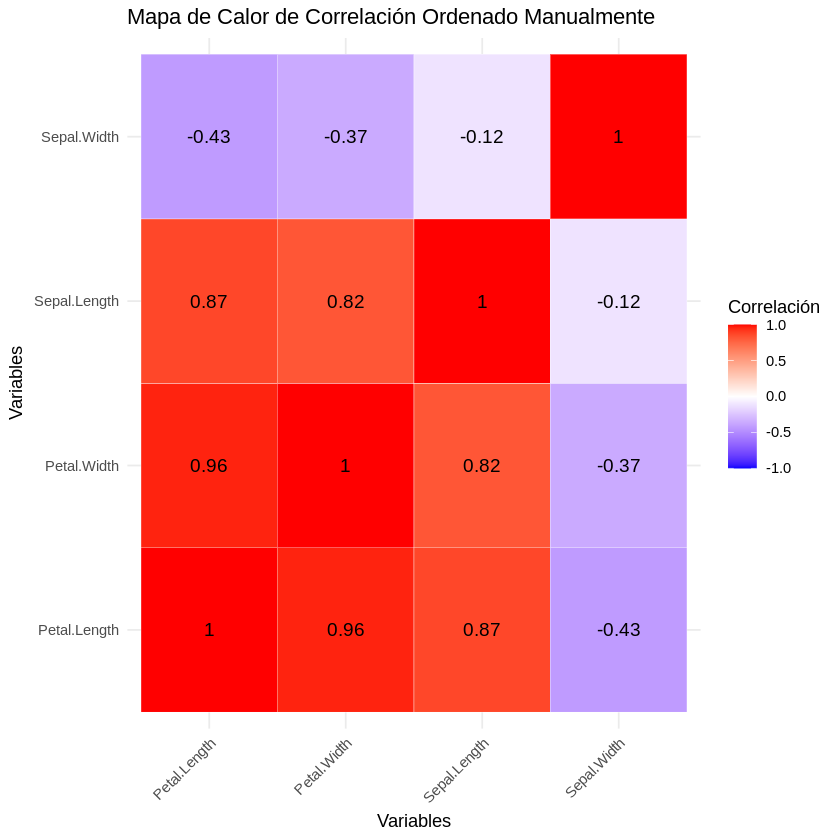

In [ ]:
# Calcular la matriz de correlación
cor_matrix <- cor(iris_data[, 1:4])

# Reordenar manualmente las filas y columnas en el mismo orden
cor_matrix <- cor_matrix[order(row.names(cor_matrix)), order(colnames(cor_matrix))]

# Convertir la matriz a formato largo (sin alterar el orden)
melted_cor <- reshape2::melt(cor_matrix, varnames = c("Var1", "Var2"))

# Crear el mapa de calor con los valores de correlación
ggplot(data = melted_cor, aes(x = Var2, y = Var1, fill = value)) +
  geom_tile(color = "white") +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white",
                       midpoint = 0, limit = c(-1, 1), space = "Lab",
                       name = "Correlación") +
  geom_text(aes(label = round(value, 2)), color = "black", size = 4) + # Añadir valores de correlación
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  labs(title = "Mapa de Calor de Correlación Ordenado Manualmente",
       x = "Variables",
       y = "Variables")


**Observaciones:** En el mapa de calor de correlación se observa que las variables relacionadas con los pétalos, como Petal.Length y Petal.Width, presentan una correlación positiva muy alta (0.96), indicando que a medida que aumenta la longitud del pétalo, también lo hace su ancho. Por otro lado, las correlaciones entre las medidas de los sépalos (Sepal.Length y Sepal.Width) son más débiles y en algunos casos negativas, como entre Sepal.Width y Petal.Length (-0.43). Esto sugiere que las características de los sépalos y los pétalos no están tan relacionadas. Este análisis inicial evidencia que las medidas de los pétalos tienen una mayor dependencia mutua en comparación con las medidas de los sépalos.
También se observa que las medidas de los pétalos tienen una mayor variabilidad en comparación con las del sépalo, lo cual las hace más útiles para separar los grupos. Por ejemplo, la longitud del pétalo varía entre 1 y 6.9 cm, un rango mucho más amplio que el de las medidas del sépalo. Esto refuerza la idea de que los pétalos son un buen punto de partida para identificar patrones en los datos.

**Identificación de posibles problemas**.


**Verificar valores faltantes:**

In [ ]:
# Verificar si hay valores faltantes
any(is.na(iris))

[1] FALSE

**Observación:** Los resultados muestran que no hay valores faltantes en el dataset Iris, es decir no hay necesidad de imputar datos o realizar correcciones en este aspecto. Ahora, se continua en el analice de los valores atípicos mediante los diagramas de caja para cada variable, como la longitud y el ancho del sépalo o del pétalo.

**Detectar valores atípicos:**

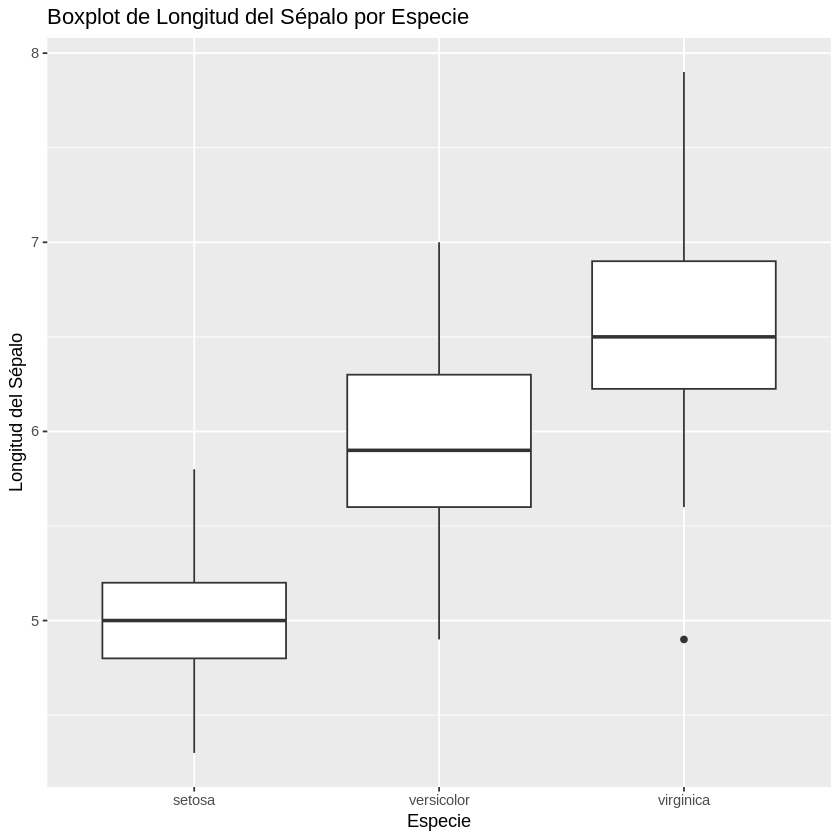

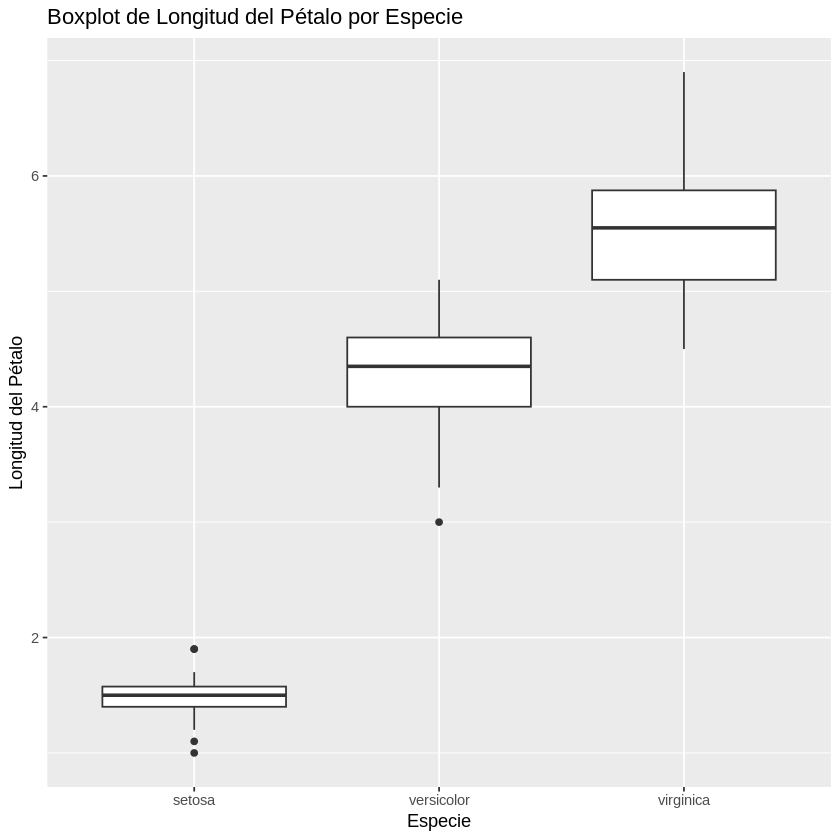

In [ ]:
# Diagramas de caja para detectar valores atípicos
ggplot(iris, aes(x = Species, y = Sepal.Length)) +
    geom_boxplot() +
    labs(title = "Boxplot de Longitud del Sépalo por Especie",
         x = "Especie",
         y = "Longitud del Sépalo")

ggplot(iris, aes(x = Species, y = Petal.Length)) +
    geom_boxplot() +
    labs(title = "Boxplot de Longitud del Pétalo por Especie",
         x = "Especie",
         y = "Longitud del Pétalo")


**Observaciones:** Los diagramas de caja muestran una separación significativa entre las especies, especialmente en la longitud del pétalo. Setosa se destaca por tener pétalos mucho más pequeños en comparación con Versicolor y Virginica, mientras que en la longitud del sépalo las diferencias son menos evidentes, con algo de superposición entre Versicolor y Virginica.

Lo interesante es que no hay valores atípicos extremos en ninguno de los casos, lo cual es una excelente señal. Esto significa que los datos son consistentes y podemos trabajar con ellos sin preocuparnos por realizar correcciones o ajustes.

**Normalización de las variables:**

In [ ]:
# Normalizar las variables numéricas
iris_normalizado <- as.data.frame(scale(iris[, -5]))  # Excluye la columna Species
head(iris_normalizado)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.8976739,1.01560199,-1.335752,-1.311052
2,-1.1392005,-0.13153881,-1.335752,-1.311052
3,-1.3807271,0.32731751,-1.392399,-1.311052
4,-1.5014904,0.09788935,-1.279104,-1.311052
5,-1.0184372,1.24503015,-1.335752,-1.311052
6,-0.5353840,1.93331463,-1.165809,-1.048667


In [ ]:
# Agregar la columna de especies
iris_normalizado$Species <- iris$Species

In [ ]:
summary(iris_normalizado[, -5])

  Sepal.Length       Sepal.Width       Petal.Length      Petal.Width     
 Min.   :-1.86378   Min.   :-2.4258   Min.   :-1.5623   Min.   :-1.4422  
 1st Qu.:-0.89767   1st Qu.:-0.5904   1st Qu.:-1.2225   1st Qu.:-1.1799  
 Median :-0.05233   Median :-0.1315   Median : 0.3354   Median : 0.1321  
 Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.67225   3rd Qu.: 0.5567   3rd Qu.: 0.7602   3rd Qu.: 0.7880  
 Max.   : 2.48370   Max.   : 3.0805   Max.   : 1.7799   Max.   : 1.7064  

**Observación:** La normalización se completó correctamente. Todas las variables numéricas ahora tienen una media cercana a 0 y rangos más uniformes, con valores ajustados en términos de desviaciones estándar. Esto garantiza que ninguna variable domine el análisis debido a diferencias de escala, lo que es importante para las técnicas de agrupamiento. Por ejemplo, las variables como la longitud y el ancho del sépalo ahora tienen valores comparables con las del pétalo.

**Aplicar técnicas de agrupamiento**

In [ ]:
install.packages("factoextra")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(factoextra)


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



**Preparar no incluir datos categóricos (especies)**

In [ ]:
# Normalizar el dataset (excluyendo la última columna de Species)
iris_normalizado <- scale(iris_data[, -5])  # Solo las variables numéricas


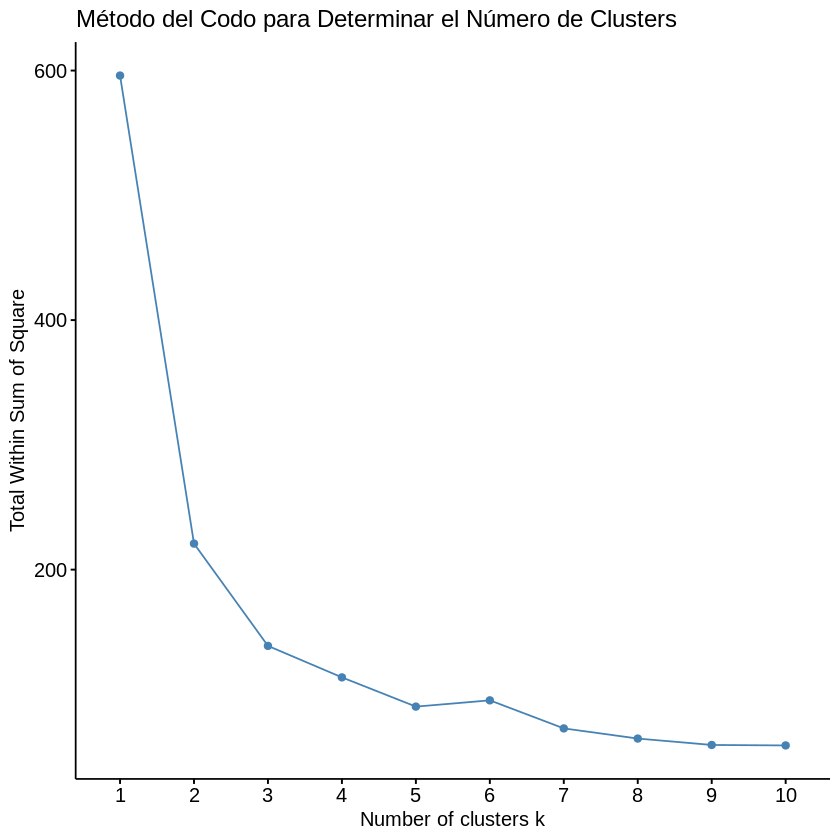

In [ ]:
fviz_nbclust(iris_normalizado, kmeans, method = "wss") +
  labs(title = "Método del Codo para Determinar el Número de Clusters")


**Aplicación de algoritmo K-Means**

In [ ]:
# Aplicar K-Means con 3 clusters
set.seed(123)  # Para reproducibilidad
kmeans_model <- kmeans(iris_normalizado[, -5], centers = 3, nstart = 25)
print(kmeans_model)


K-means clustering with 3 clusters of sizes 50, 53, 47

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1  -1.01119138  0.85041372   -1.3006301  -1.2507035
2  -0.05005221 -0.88042696    0.3465767   0.2805873
3   1.13217737  0.08812645    0.9928284   1.0141287

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 2 2 2 3 2 2 2 2 2 2 2 2 3 2 2 2 2 3 2 2 2
 [75] 2 3 3 3 2 2 2 2 2 2 2 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 3 3 3 2 3 3 3 3
[112] 3 3 2 2 3 3 3 3 2 3 2 3 2 3 3 2 3 3 3 3 3 3 2 2 3 3 3 2 3 3 3 2 3 3 3 2 3
[149] 3 2

Within cluster sum of squares by cluster:
[1] 47.35062 44.08754 47.45019
 (between_SS / total_SS =  76.7 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      


**Observaciones:** El método del codo confirma que el número óptimo de clusters es 3, lo cual coincide con las tres especies en el dataset Iris. La curva muestra una disminución pronunciada en la suma de las distancias dentro de los clusters hasta k=3, después de lo cual la mejora se estabiliza. El modelo de K-Means también generó 3 clusters, y se observa cómo se asignaron las observaciones a cada cluster. Estos resultados son coherentes con las expectativas del dataset y refuerzan la idea de que K-Means es una técnica efectiva para este caso.

**Visualización de los clusters obtenidos con K-Means**

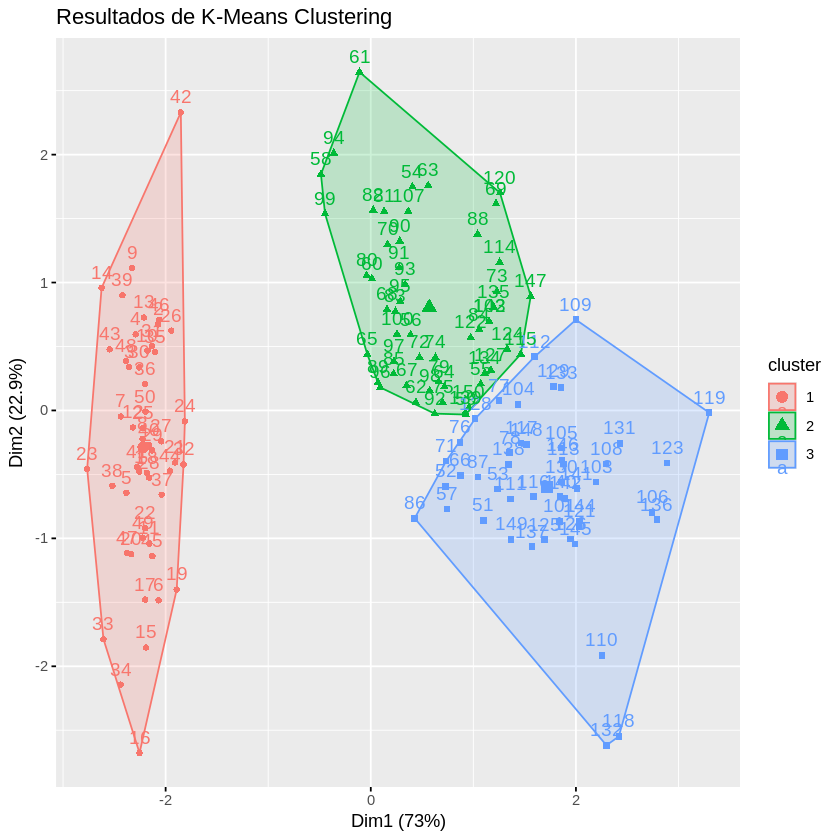

In [ ]:
# Visualización de los clusters de K-Means
fviz_cluster(kmeans_model, data = iris_normalizado[, -5]) +
    labs(title = "Resultados de K-Means Clustering")


**Observaciones:** El gráfico de los clusters obtenidos con K-Means muestra separación entre los tres grupos. Cluster 1 (rojo) representa a Setosa de forma nítida, sin solapamiento con los otros clusters. Por otro lado, Cluster 2 (verde) y Cluster 3 (azul), que probablemente corresponden a Versicolor y Virginica, muestran cierto grado de superposición en los bordes, lo cual refleja la proximidad natural entre estas especies en términos de sus características. La representación en dos dimensiones principales captura un 95% de la variabilidad total (73% en la primera dimensión y 22% en la segunda), lo que significa que el gráfico es una buena aproximación de la estructura de los datos. Este resultado evidencia que K-Means es efectivo para este dataset, aunque es posible que Versicolor y Virginica necesiten métodos más elaborados para una separación más precisa.

**Implementar modelo de mezclas Gausssianas (GMM)**

**Instalacón libreria mclust**

In [ ]:
# Instalar la librería mclust
install.packages("mclust")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Cargar la librería mclust y ajustar el modelo
library(mclust)
gmm_model <- Mclust(iris_normalizado[, -5])
summary(gmm_model)

Package 'mclust' version 6.1.1
Type 'citation("mclust")' for citing this R package in publications.



---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VVV (ellipsoidal, varying volume, shape, and orientation) model with 2
components: 

 log-likelihood   n df       BIC       ICL
      -322.6936 150 29 -790.6956 -790.6969

Clustering table:
  1   2 
 50 100 

**Observación:** El modelo GMM se ajustó correctamente, pero ha identificado 2 componentes como el número óptimo de clusters en lugar de los 3 que esperábamos. Esto puede deberse a la similitud entre las especies Versicolor y Virginica, que a menudo se solapan y pueden ser vistas como un único cluster desde la perspectiva probabilística del modelo. La tabla de clusters muestra que el modelo asignó 50 observaciones al primer cluster y 100 al segundo, lo que refuerza la idea de que Setosa (que tiene 50 muestras bien separadas) fue identificada como un grupo, mientras que Versicolor y Virginica fueron combinadas en el otro.

**Visualizar los clusters de GMM**

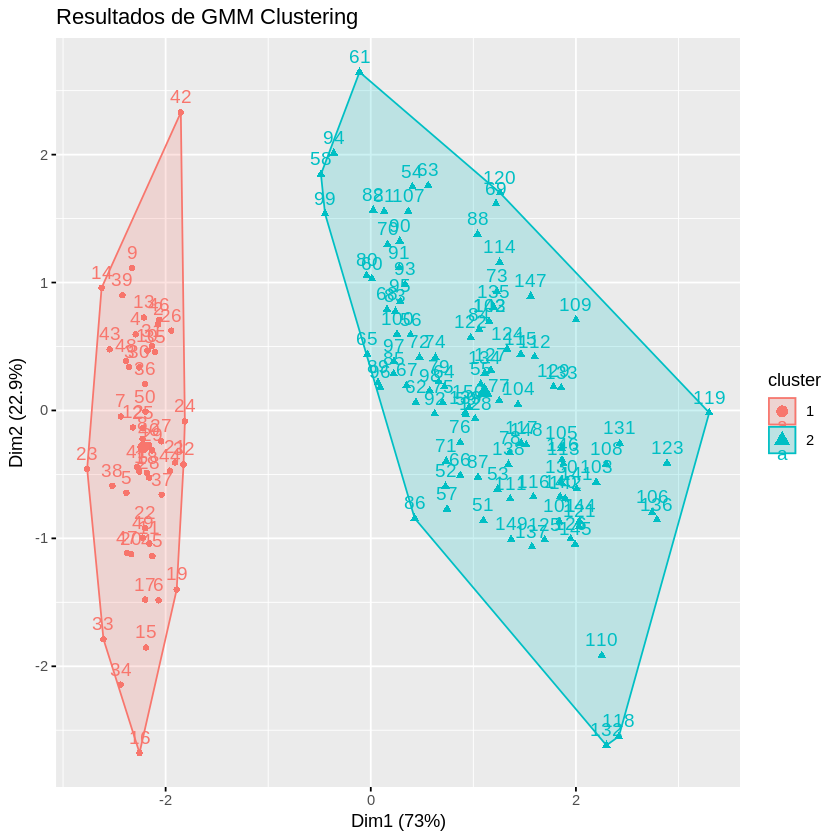

In [ ]:
# Visualización de los clusters generados por GMM
fviz_cluster(list(data = iris_normalizado[, -5], cluster = gmm_model$classification)) +
    labs(title = "Resultados de GMM Clustering")

**Observaciones:** El gráfico de los clusters generados por GMM muestra que el modelo identificó claramente dos grupos principales. Cluster 1 (rojo) corresponde probablemente a Setosa, que está bien separada y no tiene solapamiento con el otro cluster. Por otro lado, Cluster 2 (azul) agrupa tanto a Versicolor como a Virginica, reflejando que estas especies tienen características similares y tienden a solaparse en este espacio reducido. Esto explica por qué GMM seleccionó solo dos componentes: desde el punto de vista probabilístico, Versicolor y Virginica son difíciles de separar sin más información o dimensiones adicionales. Este comportamiento es esperado, ya que GMM busca maximizar el ajuste probabilístico más que crear divisiones rígidas.

Ahora compararemos los clusters predichos por GMM con las etiquetas reales del dataset para evaluar qué tan bien el modelo logró identificar las especies.

**Comparar clusters de GMM con las etiquetas reales**

In [ ]:
# Matriz de confusión: Predicción vs. Realidad
table(Predicted = gmm_model$classification, Actual = iris$Species)


         Actual
Predicted setosa versicolor virginica
        1     50          0         0
        2      0         50        50

**Observaciones:** La matriz de confusión muestra que el modelo GMM identificó perfectamente las observaciones de la especie Setosa, asignándolas todas al Cluster 1. Sin embargo, las observaciones de Versicolor y Virginica fueron agrupadas juntas en el Cluster 2, sin lograr diferenciarlas. Esto confirma que GMM considera a Setosa como un grupo claramente separado, pero no encuentra suficiente evidencia para distinguir entre Versicolor y Virginica. Este resultado es consistente con la visualización previa, donde los datos de estas dos especies estaban solapados, dificultando su separación basada únicamente en las características disponibles

**Comparación: K-Means vs. GMM**

Número de clusters: K-Means: Identificó correctamente 3 clusters, coincidiendo con las tres especies del dataset. GMM: Optó por 2 clusters, agrupando Versicolor y Virginica en un solo grupo, lo cual refleja las similitudes entre estas especies. Separación de clusters: K-Means: Mostró una separación más clara entre los tres clusters, aunque con cierto solapamiento entre Versicolor y Virginica. GMM: Realizó una separación más "probabilística", lo que llevó a fusionar Versicolor y Virginica en un solo cluster. Sin embargo, identificó perfectamente a Setosa. Evaluación de las etiquetas reales: K-Means: Asignó correctamente la mayoría de las observaciones, separando las tres especies con mayor precisión. GMM: Fue perfecto para Setosa, pero no distinguió entre Versicolor y Virginica. Adaptabilidad: K-Means: Funciona bien cuando los datos tienen grupos bien definidos y equidistantes. GMM: Es más flexible al modelar datos solapados, pero en este caso no logró diferenciar completamente entre las especies más similares.

Ambos métodos tienen fortalezas y debilidades, y sus resultados son consistentes con las características del dataset Iris. K-Means funciona bien cuando los clusters están claramente definidos, mientras que GMM, al ser probabilístico, agrupa especies similares en un solo cluster.